In [1]:
import datetime
import math
import os
import pickle
import re
import logging
from collections import Counter, OrderedDict, defaultdict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import torch
import pyro.distributions as dist
from pyro.ops.tensor_utils import convolve
from scipy.signal import savgol_filter

In [16]:
df_counts_time = pd.read_csv('./4days_date.csv', header = 0)
time = pd.to_datetime(df_counts_time['date'], format='%Y-%m-%d')

lineages = torch.load('./Omicron_experimental_data_new.pkl')['lineages']
country = torch.load('./Omicron_experimental_data_new.pkl')['locations']

counts = torch.load('./Omicron_experimental_data_new.pkl')['counts']
counts = counts / (counts.sum(-1).unsqueeze(-1))

counts1 = counts.numpy()
counts = np.nan_to_num(counts1)

In [5]:
def get_lineage_index(list):
    index = []
    for i in range(len(list)):
        index.append(lineages.index(list[i]))
    return index

## get counts & forecast data
def get_counts(country_index, lineage_index):
    df_counts = pd.DataFrame(counts[:, country_index, lineage_index])
    return df_counts

def get_forecast(country_index, lineage_index, forecast):
    df_forecast = pd.DataFrame(forecast[:, country_index, lineage_index].squeeze(1))
    return df_forecast

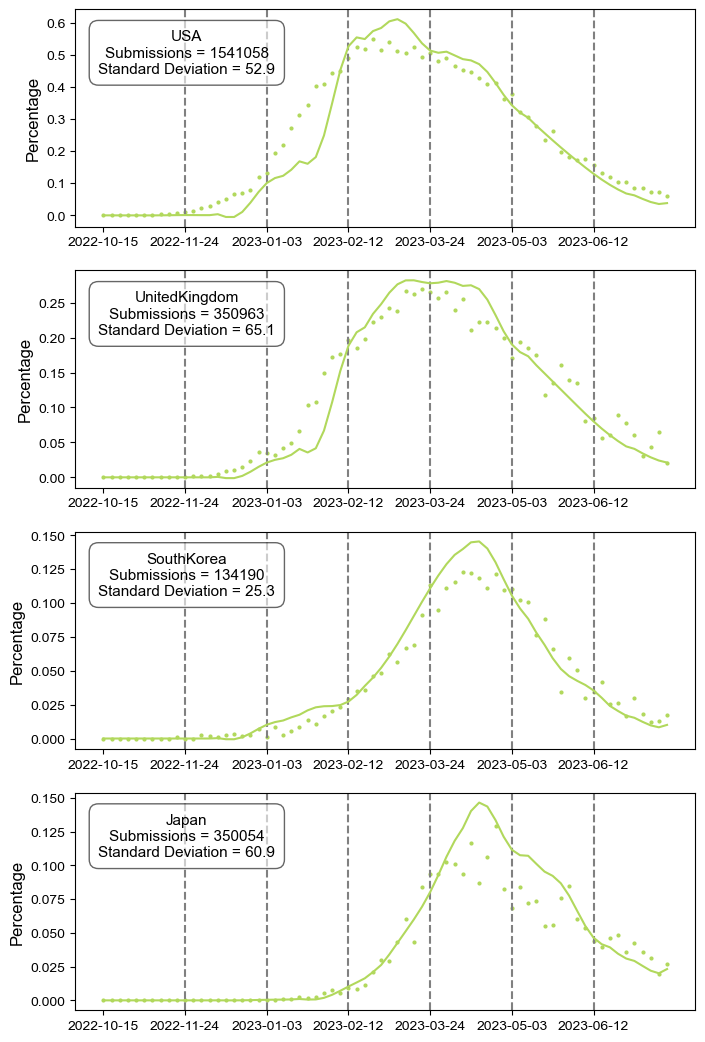

In [18]:
forecast_result_4 = torch.load('./10phase_AE_36_reparam.pkl', map_location=torch.device('cpu'))
plt.figure(figsize=(8,13))
plt.rcParams['font.sans-serif'] = 'Arial'
start = 87
m = start
n=157

# lineage = ['BA.2','BA.5.1','BA.5.2.1', 'BQ.1.1','XBB.1.5', 'XBB.1.9.1', 'XBB.1.16', 'EG.5.1', 'HV.1', 'JN.1']
lineage = [ 'XBB.1.5']
colors = ['#b1d85c']

plt.subplot(411)
country_index1 = country.index('USA')
for i in range(len(lineage)):
    for j in range(len(time[:counts.shape[0]][start:n])):
        try:
            # if get_counts(country_index1, get_lineage_index(lineage))[start:-1][i][start+j] !=0 and get_counts(country_index1, get_lineage_index(lineage))[start:-1][i][start+j+1] !=0 and get_counts(country_index1, get_lineage_index(lineage))[start:-1][i][start+j+2] !=0 :
                plt.plot(time[:counts.shape[0]][start:n][start+j], get_counts(country_index1, get_lineage_index(lineage))[start:n][i][start+j], color = colors[i], lw=0, marker='o', markersize=2)
        except:
            plt.plot(time[:counts.shape[0]][start:n][start+j], get_counts(country_index1, get_lineage_index(lineage))[start:n][i][start+j], color = colors[i], lw=0, marker='o', markersize=2)
    plt.plot(time[:counts.shape[0]][start:n], savgol_filter(get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[:counts.shape[0]][i][start:n], 10, 5), color = colors[i], lw=1.5, zorder=5)
plt.ylabel('Percentage', fontsize=12) 
# plt.title('Forecast for XBB.1.5 in '+country[country_index1])
for i in range(int((n-m)/10)-1):
        plt.axvline(x=time[m+10+10*i],linestyle='--', color='grey')
datetime_plot = []
string_plot = []
for i in range(n - m):
    if i % 10 == 0:
        datetime_plot.append(time[i + m])
        string_plot.append(time[i + m].strftime('%Y-%m-%d'))
plt.xticks(datetime_plot, string_plot, fontsize=10)
plt.text(0.18, 0.8, country[country_index1]+'\nSubmissions = 1541058\nStandard Deviation = 52.9',
            fontsize = 11,
            horizontalalignment='center',
            verticalalignment='center', 
            transform=plt.gca().transAxes,
            bbox=dict(boxstyle='round,pad=0.6',facecolor='white',alpha=0.6)
               )

plt.subplot(412)
country_index1 = country.index('UnitedKingdom')
for i in range(len(lineage)):
    for j in range(len(time[:counts.shape[0]][start:n])):
        try:
            # if get_counts(country_index1, get_lineage_index(lineage))[start:-1][i][start+j] !=0 and get_counts(country_index1, get_lineage_index(lineage))[start:-1][i][start+j+1] !=0 and get_counts(country_index1, get_lineage_index(lineage))[start:-1][i][start+j+2] !=0 :
                plt.plot(time[:counts.shape[0]][start:n][start+j], get_counts(country_index1, get_lineage_index(lineage))[start:n][i][start+j], color = colors[i], lw=0, marker='o', markersize=2)
        except:
            plt.plot(time[:counts.shape[0]][start:n][start+j], get_counts(country_index1, get_lineage_index(lineage))[start:n][i][start+j], color = colors[i], lw=0, marker='o', markersize=2)
    plt.plot(time[:counts.shape[0]][start:n], savgol_filter(get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[:counts.shape[0]][i][start:n], 10, 5), color = colors[i], lw=1.5, zorder=5, label = lineage[i])
plt.ylabel('Percentage', fontsize=12) 
# plt.title('Forecast Result of '+country[country_index1])
for i in range(int((n-m)/10)-1):
        plt.axvline(x=time[m+10+10*i],linestyle='--', color='grey')
datetime_plot = []
string_plot = []
for i in range(n - m):
    if i % 10 == 0:
        datetime_plot.append(time[i + m])
        string_plot.append(time[i + m].strftime('%Y-%m-%d'))
plt.xticks(datetime_plot, string_plot, fontsize=10)
plt.text(0.18, 0.8, country[country_index1]+'\nSubmissions = 350963\nStandard Deviation = 65.1',
            fontsize = 11,
            horizontalalignment='center',
            verticalalignment='center', 
            transform=plt.gca().transAxes,
            bbox=dict(boxstyle='round,pad=0.6',facecolor='white',alpha=0.6)
               )


plt.subplot(413)
country_index1 = country.index('SouthKorea')
for i in range(len(lineage)):
    for j in range(len(time[:counts.shape[0]][start:n])):
        try:
            # if get_counts(country_index1, get_lineage_index(lineage))[start:-1][i][start+j] !=0 and get_counts(country_index1, get_lineage_index(lineage))[start:-1][i][start+j+1] !=0 and get_counts(country_index1, get_lineage_index(lineage))[start:-1][i][start+j+2] !=0 :
                plt.plot(time[:counts.shape[0]][start:n][start+j], get_counts(country_index1, get_lineage_index(lineage))[start:n][i][start+j], color = colors[i], lw=0, marker='o', markersize=2)
        except:
            plt.plot(time[:counts.shape[0]][start:n][start+j], get_counts(country_index1, get_lineage_index(lineage))[start:n][i][start+j], color = colors[i], lw=0, marker='o', markersize=2)
    plt.plot(time[:counts.shape[0]][start:n], savgol_filter(get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[:counts.shape[0]][i][start:n], 10, 5), color = colors[i], lw=1.5, zorder=5, label = lineage[i])
plt.ylabel('Percentage', fontsize=12) 
# plt.title('Forecast Result of '+country[country_index1])
for i in range(int((n-m)/10)-1):
        plt.axvline(x=time[m+10+10*i],linestyle='--', color='grey')
datetime_plot = []
string_plot = []
for i in range(n - m):
    if i % 10 == 0:
        datetime_plot.append(time[i + m])
        string_plot.append(time[i + m].strftime('%Y-%m-%d'))
plt.xticks(datetime_plot, string_plot, fontsize=10)
plt.text(0.18, 0.8, country[country_index1]+'\nSubmissions = 134190\nStandard Deviation = 25.3',
            fontsize = 11,
            horizontalalignment='center',
            verticalalignment='center', 
            transform=plt.gca().transAxes,
            bbox=dict(boxstyle='round,pad=0.6',facecolor='white',alpha=0.6)
               )

plt.subplot(414)
country_index1 = country.index('Japan')
for i in range(len(lineage)):
    for j in range(len(time[:counts.shape[0]][start:n])):
        try:
            # if get_counts(country_index1, get_lineage_index(lineage))[start:-1][i][start+j] !=0 and get_counts(country_index1, get_lineage_index(lineage))[start:-1][i][start+j+1] !=0 and get_counts(country_index1, get_lineage_index(lineage))[start:-1][i][start+j+2] !=0 :
                plt.plot(time[:counts.shape[0]][start:n][start+j], get_counts(country_index1, get_lineage_index(lineage))[start:n][i][start+j], color = colors[i], lw=0, marker='o', markersize=2)
        except:
            plt.plot(time[:counts.shape[0]][start:n][start+j], get_counts(country_index1, get_lineage_index(lineage))[start:n][i][start+j], color = colors[i], lw=0, marker='o', markersize=2)
    plt.plot(time[:counts.shape[0]][start:n], savgol_filter(get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[:counts.shape[0]][i][start:n], 10, 5), color = colors[i], lw=1.5, zorder=5, label = lineage[i])
plt.ylabel('Percentage', fontsize=12) 
# plt.title('Forecast Result of '+country[country_index1])
for i in range(int((n-m)/10)-1):
        plt.axvline(x=time[m+10+10*i],linestyle='--', color='grey')
datetime_plot = []
string_plot = []
for i in range(n - m):
    if i % 10 == 0:
        datetime_plot.append(time[i + m])
        string_plot.append(time[i + m].strftime('%Y-%m-%d'))
plt.xticks(datetime_plot, string_plot, fontsize=10)
plt.text(0.18, 0.8, country[country_index1]+'\nSubmissions = 350054\nStandard Deviation = 60.9',
            fontsize = 11,
            horizontalalignment='center',
            verticalalignment='center', 
            transform=plt.gca().transAxes,
            bbox=dict(boxstyle='round,pad=0.6',facecolor='white',alpha=0.6)
               )

In [7]:
counts = torch.load('./Omicron_experimental_data_new.pkl')['counts']
forecast_AE = torch.load('./10phase_AE_36_reparam.pkl', map_location=torch.device('cpu')).data.cpu()[:195,:,:]
true = counts + 1e-20
count = true.sum(-1, True)
true_probs = true.data.cpu() / count.data.cpu()
def loss_cal(model): 
    pred = model

    # error = (pred - true_probs) * count**0.5  # scaled by Poisson stddev
    error = pred - true_probs
    mae = error.abs()  # average over time
    mse = error.square()  # average over time

    return error, mae, mse
cal_MAE = loss_cal(forecast_AE)[1]
cal_MSE = loss_cal(forecast_AE)[2]
cal_count = counts.sum(0)
country = torch.load('./Omicron_experimental_data_new.pkl')['locations']
lineages = torch.load('./Omicron_experimental_data_new.pkl')['lineages']

In [9]:
lineage_index = lineages.index('XBB.1.5')

country_index1 = country.index('USA')  # 87-117
country_index2 = country.index('UnitedKingdom')
country_index3 = country.index('SouthKorea')  # 107-137
country_index4 = country.index('Japan')  # 99-129

### MAE 10 bins
print(country[country_index1]+': '+str(cal_MAE[:,country_index1, lineage_index][117:127].mean()))
print(country[country_index2]+': '+str(cal_MAE[:,country_index2, lineage_index][109:119].mean()))
print(country[country_index3]+': '+str(cal_MAE[:,country_index3, lineage_index][107:117].mean()))
print(country[country_index4]+': '+str(cal_MAE[:,country_index4, lineage_index][97:107].mean()))

USA: tensor(0.0348)
UnitedKingdom: tensor(0.0616)
SouthKorea: tensor(0.0037)
Japan: tensor(0.0002)


In [315]:
### MAE 10 bins
lineage_index = lineages.index('XBB.1.5')

country_index1 = country.index('USA')  # 87-117
country_index2 = country.index('UnitedKingdom')
country_index3 = country.index('SouthKorea')  # 99-129
country_index4 = country.index('Japan')  # 107-137

USA_MAE = cal_MAE[:,country_index1, lineage_index][98:108].mean()
UK_MAE = cal_MAE[:,country_index2, lineage_index][98:108].mean()
SouthKorea_MAE = cal_MAE[:,country_index3, lineage_index][108:118].mean()
Japan_MAE = cal_MAE[:,country_index4, lineage_index][108:118].mean()

print(country[country_index1]+' MAE = '+str(USA_MAE))
print(country[country_index2]+' MAE = '+str(UK_MAE))
print(country[country_index3]+' MAE = '+str(SouthKorea_MAE))
print(country[country_index4]+' MAE = '+str(Japan_MAE))

USA MAE = tensor(0.0527)
UnitedKingdom MAE = tensor(0.0116)
SouthKorea MAE = tensor(0.0036)
Japan MAE = tensor(0.0019)


In [8]:
### MAE 20 bins
lineage_index = lineages.index('XBB.1.5')

country_index1 = country.index('USA')  # 87-117
country_index2 = country.index('UnitedKingdom')
country_index3 = country.index('SouthKorea')  # 99-129
country_index4 = country.index('Japan')  # 107-137

USA_MAE = cal_MAE[:,country_index1, lineage_index][96:116].mean()
UK_MAE = cal_MAE[:,country_index2, lineage_index][96:116].mean()
SouthKorea_MAE = cal_MAE[:,country_index3, lineage_index][106:126].mean()
Japan_MAE = cal_MAE[:,country_index4, lineage_index][106:126].mean()

print(country[country_index1]+' MAE = '+str(USA_MAE))
print(country[country_index2]+' MAE = '+str(UK_MAE))
print(country[country_index3]+' MAE = '+str(SouthKorea_MAE))
print(country[country_index4]+' MAE = '+str(Japan_MAE))

USA MAE = tensor(0.0882)
UnitedKingdom MAE = tensor(0.0261)
SouthKorea MAE = tensor(0.0061)
Japan MAE = tensor(0.0033)


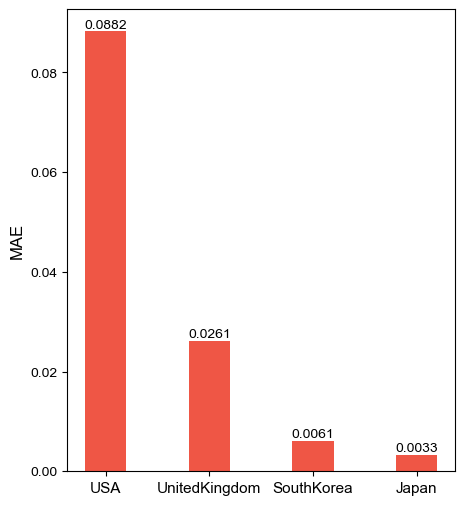

In [11]:
plt.rcParams['font.sans-serif'] = ['Arial']
x_label = [country[country_index1], country[country_index2], country[country_index3], country[country_index4]]
sigma_Eu = np.array([USA_MAE,UK_MAE,SouthKorea_MAE,Japan_MAE])

bar_width = 0.2
index_sigma_Eu = np.arange(len(sigma_Eu))/2 
# index_sigma_Pu = index_sigma_Eu + bar_width

fig=plt.figure(figsize=(5,6))
ax1 = fig.add_subplot(111)
ax1.bar(index_sigma_Eu, height=sigma_Eu, width=bar_width, color = '#EE4431', alpha = 0.9)
# ax1.bar(index_sigma_Eu, height=sigma_Pu, width=bar_width,color = '#92C2DD')

ax1.set_ylabel('MAE', fontsize=12)
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)
plt.xticks(index_sigma_Eu + bar_width/2 -0.1 , x_label,fontsize=11)#,rotation=70)
for x,y in zip(index_sigma_Eu,sigma_Eu):
    plt.text(x+0.0001,y+0.0001,'%.4f' %y, ha='center',va='bottom')

In [14]:
### MSE 10 bins
print(country[country_index1]+': '+str(cal_MSE[:,country_index1, lineage_index][117:127].mean()))
print(country[country_index2]+': '+str(cal_MSE[:,country_index2, lineage_index][109:119].mean()))
print(country[country_index3]+': '+str(cal_MSE[:,country_index3, lineage_index][107:117].mean()))
print(country[country_index4]+': '+str(cal_MSE[:,country_index4, lineage_index][97:107].mean()))

USA: tensor(0.0016)
UnitedKingdom: tensor(0.0055)
SouthKorea: tensor(1.9781e-05)
Japan: tensor(6.3146e-08)


In [15]:
### MSE 10 bins
lineage_index = lineages.index('XBB.1.5')

country_index1 = country.index('USA')  # 87-117
country_index2 = country.index('UnitedKingdom')
country_index3 = country.index('SouthKorea')  # 99-129
country_index4 = country.index('Japan')  # 107-137

USA_MSE = cal_MSE[:,country_index1, lineage_index][98:108].mean()
UK_MSE = cal_MSE[:,country_index2, lineage_index][98:108].mean()
SouthKorea_MSE = cal_MSE[:,country_index3, lineage_index][108:118].mean()
Japan_MSE = cal_MSE[:,country_index4, lineage_index][108:118].mean()

print(country[country_index1]+' MSE = '+str(USA_MSE))
print(country[country_index2]+' MSE = '+str(UK_MSE))
print(country[country_index3]+' MSE = '+str(SouthKorea_MSE))
print(country[country_index4]+' MSE = '+str(Japan_MSE))

USA MSE = tensor(0.0036)
UnitedKingdom MSE = tensor(0.0003)
SouthKorea MSE = tensor(1.9246e-05)
Japan MSE = tensor(7.2795e-06)


In [12]:
### MSE 20 bins
lineage_index = lineages.index('XBB.1.5')

country_index1 = country.index('USA')  # 87-117
country_index2 = country.index('UnitedKingdom')
country_index3 = country.index('SouthKorea')  # 99-129
country_index4 = country.index('Japan')  # 107-137

USA_MSE = cal_MSE[:,country_index1, lineage_index][96:116].mean()
UK_MSE = cal_MSE[:,country_index2, lineage_index][96:116].mean()
SouthKorea_MSE = cal_MSE[:,country_index3, lineage_index][106:126].mean()
Japan_MSE = cal_MSE[:,country_index4, lineage_index][106:126].mean()

print(country[country_index1]+' MSE = '+str(USA_MSE))
print(country[country_index2]+' MSE = '+str(UK_MSE))
print(country[country_index3]+' MSE = '+str(SouthKorea_MSE))
print(country[country_index4]+' MSE = '+str(Japan_MSE))

USA MSE = tensor(0.0126)
UnitedKingdom MSE = tensor(0.0017)
SouthKorea MSE = tensor(5.3149e-05)
Japan MSE = tensor(2.8324e-05)


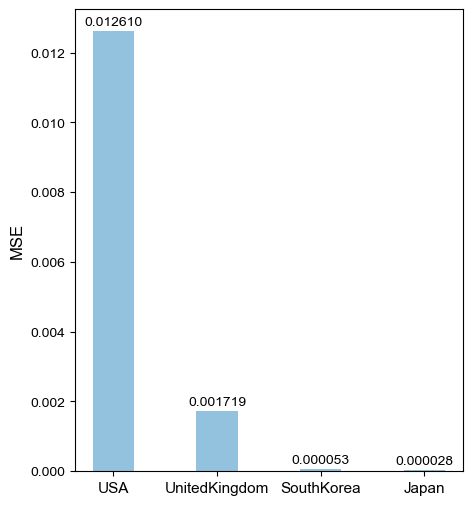

In [14]:
plt.rcParams['font.sans-serif'] = ['Arial']
x_label = [country[country_index1], country[country_index2], country[country_index3], country[country_index4]]
sigma_Eu = np.array([USA_MSE,UK_MSE,SouthKorea_MSE,Japan_MSE])

bar_width = 0.2
index_sigma_Eu = np.arange(len(sigma_Eu))/2
# index_sigma_Pu = index_sigma_Eu + bar_width

fig=plt.figure(figsize=(5,6))
ax1 = fig.add_subplot(111)
ax1.bar(index_sigma_Eu, height=sigma_Eu, width=bar_width,color = '#92C2DD')

ax1.set_ylabel('MSE',fontsize=12)
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)
plt.xticks(index_sigma_Eu + bar_width/2 -0.1 , x_label,fontsize=11)#,rotation=70)
for x,y in zip(index_sigma_Eu,sigma_Eu):
    plt.text(x+0.0001,y+0.0001,'%.6f' %y, ha='center',va='bottom')